In [1]:
# Displays figures in line
# %matplotlib inline

# Import dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
import json
plt.style.use('ggplot')
import gmaps
# import gmaps.datasets
import datetime

# Google developer API key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)

from pprint import pprint

In [2]:
import matplotlib.pyplot as plt2

In [3]:
# url = "https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Public_Safety_WebMercator/MapServer/24/query?where=1%3D1&outFields=*&outSR=4326&f=json"
url = "https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Public_Safety_WebMercator/MapServer/24/query?where=1%3D1&outFields=*&outSR=4326&f=json&returnIdsOnly=true"

In [4]:
response = requests.get(url)

resp_dict = json.loads(response.text)

objectIds = resp_dict["objectIds"]

objectId_count = len(objectIds)

# print(objectId_count)
  
crash_data = []  
count = 0
start = 0
end = 0
batch = 125

while count < objectId_count:

    end = end + batch
    url = "https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Public_Safety_WebMercator/MapServer/24/query?where=1%3D1&outFields=*&outSR=4326&f=json&objectIds= "+ str(objectIds[start:end]).replace('[','').replace(']','')
# url = 'https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Public_Safety_WebMercator/MapServer/24/query?where=1%3D1&outFields=*&outSR=4326&f=json&objectIds= ' + str(objectIds[0:125]).replace('[','').replace(']','')
 
# url = 'https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Public_Safety_WebMercator/MapServer/24/query?where=1%3D1&outFields=*&outSR=4326&f=json&objectIds=47221836,47221838,47221481'
    
    response_new = requests.get(url).json()
    start = end   
    count = count + batch 
    data = response_new['features']
    
    #pprint(start)
    #pprint(end)
#     pprint(data)


# print(len(data))
    i = 0
    for x in data:
        crash_data.append(data[i]['attributes'])
        i = i + 1
# print(crash_data)
#response_new = requests.get(url)
#print(response_new.text)

# for x in response_new['features']:
#         crash_data.append(x)

In [5]:
master_df = pd.DataFrame(crash_data)
master_df
# data = response['features']
# crash_data = []

,ADDRESS,BICYCLISTSIMPAIRED,CCN,CRIMEID,DRIVERSIMPAIRED,EVENTID,FATAL_BICYCLIST,FATAL_DRIVER,FATAL_PEDESTRIAN,FROMDATE,...,TOTAL_GOVERNMENT,TOTAL_PEDESTRIANS,TOTAL_TAXIS,TOTAL_VEHICLES,UNKNOWNINJURIES_BICYCLIST,UNKNOWNINJURIES_DRIVER,UNKNOWNINJURIES_PEDESTRIAN,WARD,XCOORD,YCOORD
0,3104 24TH STREET NE,0,18097652,27708510,0,{51B064C1-87D9-4868-B31C-7B0B71E40899},0,0,0,1.529107e+12,...,0,0,0,2,0,0,0,Ward 5,402381.744,140195.576
1,3691 22ND STREET SE,0,18097667,27708515,0,{5950C18A-0452-47DB-9146-E71DA9FDFCB8},0,0,0,1.529107e+12,...,0,0,0,2,0,0,0,Ward 8,402416.885,130683.528
2,300 MASSACHUSETTS AVENUE NE,0,18096364,27708607,0,{FDD73EC8-DFFC-4C1D-80D3-069E9BA0ED5C},0,0,0,1.528934e+12,...,0,0,0,0,0,0,0,Ward 6,399883.210,136326.730
3,2014 OTIS STREET NE,0,18097699,27708547,0,{D4D5E08C-3034-40FC-8BCF-A719D0390276},0,0,0,1.529107e+12,...,0,0,0,2,0,0,0,Ward 5,402173.886,140800.181
4,3725 12TH STREET NE,0,18097702,27708556,0,{19D892EF-ABF9-47F1-8476-3FD4E61183AD},0,0,0,1.529107e+12,...,0,0,0,3,0,0,0,Ward 5,400762.084,140839.124
5,1630 7TH STREET NW,0,18097442,27707924,0,{7133F605-C77D-48B2-86BF-143FA577F6FD},0,0,0,1.529021e+12,...,0,0,0,1,0,0,0,Ward 2,398072.763,138304.781
6,1305 SAVANNAH STREET SE,0,18097741,27708594,0,{F4CFF90A-C2D3-40FC-AB0E-7D0E0706257C},0,0,0,1.529107e+12,...,0,0,0,2,0,0,0,Ward 8,401066.001,130599.461
7,1805 MONTANA AVENUE NE,0,18097737,27708603,0,{BF8786A5-005F-44D6-8A89-BE60DAED1D49},0,0,0,1.529107e+12,...,0,0,0,2,0,0,0,Ward 5,401850.523,139072.201
8,3827 PENNSYLVANIA AVENUE SE,0,18097748,27708608,0,{F9740465-9CDA-439A-A93E-3808092F7654},0,0,0,1.529107e+12,...,0,0,0,3,0,0,0,Ward 7,404185.567,133067.086
9,INTERSTATE 395 INTERSTATE BN,0,18097735,27708615,0,{E05A0BCB-9A5C-4EBA-808C-8AB75B0E8329},0,0,0,1.529021e+12,...,1,0,0,3,0,0,0,Ward 2,398933.900,135111.310


In [6]:
master_df["FROMDATE"]=pd.to_datetime(master_df['FROMDATE'],unit='ms')
master_df["YEAR"]=pd.DatetimeIndex(master_df["FROMDATE"]).year
master_df["MONTH"]=pd.DatetimeIndex(master_df["FROMDATE"]).month

In [7]:
master_df = master_df.dropna(subset = ['FROMDATE'])
master_df = master_df.dropna(subset = ['LATITUDE'])
master_df = master_df.dropna(subset = ['LONGITUDE'])
master_df["YEAR"] = master_df["YEAR"].astype(int)
master_df["MONTH"] = master_df["MONTH"].astype(int)
# master_df
master_df.count()
# value_counts = master_df["YEAR"].value_counts()

ADDRESS                       184590
BICYCLISTSIMPAIRED            184637
CCN                           184637
CRIMEID                       184637
DRIVERSIMPAIRED               184637
EVENTID                       184637
FATAL_BICYCLIST               184637
FATAL_DRIVER                  184637
FATAL_PEDESTRIAN              184637
FROMDATE                      184637
INTAPPROACHDIRECTION          172691
LASTUPDATEDATE                  4960
LATITUDE                      184637
LOCATIONERROR                   2060
LONGITUDE                     184637
MAJORINJURIES_BICYCLIST       184637
MAJORINJURIES_DRIVER          184637
MAJORINJURIES_PEDESTRIAN      184637
MARID                         184637
MAR_ADDRESS                   177372
MAR_SCORE                     184637
MEASURE                       182586
MINORINJURIES_BICYCLIST       184637
MINORINJURIES_DRIVER          184637
MINORINJURIES_PEDESTRIAN      184637
MPDGEOX                        68723
MPDGEOY                        68723
M

In [40]:
reduced_df = master_df.loc[master_df["YEAR"] >= 2008]
reduced_df = reduced_df.loc[reduced_df["YEAR"] <= 2018]
reduced_df

,ADDRESS,BICYCLISTSIMPAIRED,CCN,CRIMEID,DRIVERSIMPAIRED,EVENTID,FATAL_BICYCLIST,FATAL_DRIVER,FATAL_PEDESTRIAN,FROMDATE,...,TOTAL_TAXIS,TOTAL_VEHICLES,UNKNOWNINJURIES_BICYCLIST,UNKNOWNINJURIES_DRIVER,UNKNOWNINJURIES_PEDESTRIAN,WARD,XCOORD,YCOORD,YEAR,MONTH
0,3104 24TH STREET NE,0,18097652,27708510,0,{51B064C1-87D9-4868-B31C-7B0B71E40899},0,0,0,2018-06-16,...,0,2,0,0,0,Ward 5,402381.744,140195.576,2018,6
1,3691 22ND STREET SE,0,18097667,27708515,0,{5950C18A-0452-47DB-9146-E71DA9FDFCB8},0,0,0,2018-06-16,...,0,2,0,0,0,Ward 8,402416.885,130683.528,2018,6
2,300 MASSACHUSETTS AVENUE NE,0,18096364,27708607,0,{FDD73EC8-DFFC-4C1D-80D3-069E9BA0ED5C},0,0,0,2018-06-14,...,0,0,0,0,0,Ward 6,399883.210,136326.730,2018,6
3,2014 OTIS STREET NE,0,18097699,27708547,0,{D4D5E08C-3034-40FC-8BCF-A719D0390276},0,0,0,2018-06-16,...,0,2,0,0,0,Ward 5,402173.886,140800.181,2018,6
4,3725 12TH STREET NE,0,18097702,27708556,0,{19D892EF-ABF9-47F1-8476-3FD4E61183AD},0,0,0,2018-06-16,...,0,3,0,0,0,Ward 5,400762.084,140839.124,2018,6
5,1630 7TH STREET NW,0,18097442,27707924,0,{7133F605-C77D-48B2-86BF-143FA577F6FD},0,0,0,2018-06-15,...,0,1,0,0,0,Ward 2,398072.763,138304.781,2018,6
6,1305 SAVANNAH STREET SE,0,18097741,27708594,0,{F4CFF90A-C2D3-40FC-AB0E-7D0E0706257C},0,0,0,2018-06-16,...,0,2,0,0,0,Ward 8,401066.001,130599.461,2018,6
7,1805 MONTANA AVENUE NE,0,18097737,27708603,0,{BF8786A5-005F-44D6-8A89-BE60DAED1D49},0,0,0,2018-06-16,...,0,2,0,0,0,Ward 5,401850.523,139072.201,2018,6
8,3827 PENNSYLVANIA AVENUE SE,0,18097748,27708608,0,{F9740465-9CDA-439A-A93E-3808092F7654},0,0,0,2018-06-16,...,0,3,0,0,0,Ward 7,404185.567,133067.086,2018,6
9,INTERSTATE 395 INTERSTATE BN,0,18097735,27708615,0,{E05A0BCB-9A5C-4EBA-808C-8AB75B0E8329},0,0,0,2018-06-15,...,0,3,0,0,0,Ward 2,398933.900,135111.310,2018,6


In [41]:
reduced_df["WEIGHTS"]= reduced_df["TOTAL_TAXIS"] + reduced_df["TOTAL_VEHICLES"] + reduced_df["TOTAL_PEDESTRIANS"] + reduced_df["TOTAL_BICYCLES"]
reduced_df.columns
reduced_df.count()


ADDRESS                       184274
BICYCLISTSIMPAIRED            184321
CCN                           184321
CRIMEID                       184321
DRIVERSIMPAIRED               184321
EVENTID                       184321
FATAL_BICYCLIST               184321
FATAL_DRIVER                  184321
FATAL_PEDESTRIAN              184321
FROMDATE                      184321
INTAPPROACHDIRECTION          172388
LASTUPDATEDATE                  4960
LATITUDE                      184321
LOCATIONERROR                   2059
LONGITUDE                     184321
MAJORINJURIES_BICYCLIST       184321
MAJORINJURIES_DRIVER          184321
MAJORINJURIES_PEDESTRIAN      184321
MARID                         184321
MAR_ADDRESS                   177058
MAR_SCORE                     184321
MEASURE                       182271
MINORINJURIES_BICYCLIST       184321
MINORINJURIES_DRIVER          184321
MINORINJURIES_PEDESTRIAN      184321
MPDGEOX                        68706
MPDGEOY                        68706
M

In [42]:
#Create dataframes for each accident type
bike_df = reduced_df.loc[reduced_df["TOTAL_BICYCLES"] >= 1]
driver_df = reduced_df.loc[reduced_df["TOTAL_VEHICLES"] >= 1]
pedestrian_df = reduced_df.loc[reduced_df["TOTAL_PEDESTRIANS"] >= 1]
taxi_df = reduced_df.loc[reduced_df["TOTAL_TAXIS"] >= 1]
gov_df = reduced_df.loc[reduced_df["TOTAL_GOVERNMENT"] >= 1]

In [43]:
bike_count = len(bike_df)
driver_count = len(driver_df)
pedestrian_count = len(pedestrian_df)
taxi_count = len(taxi_df)
gov_count = len(gov_df)

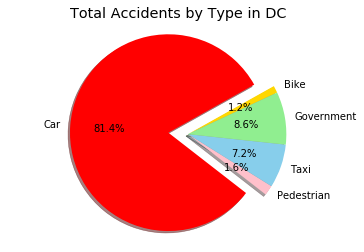

In [44]:
types = ["Bike", "Car", "Pedestrian", "Taxi", "Government"]
count = [bike_count, driver_count, pedestrian_count, taxi_count, gov_count]
colors = ["gold", "red", "pink", "skyblue", "lightgreen"]
explode = (0 ,.2 ,0, 0, 0)

total_accidents = plt.pie(count, labels = types, colors = colors, autopct="%1.1f%%", shadow = True, explode = explode, startangle=25)
plt.axis("equal")
plt.title("Total Accidents by Type in DC")
plt.savefig("Accident_Type.png", bbox_inches="tight")


In [45]:
# Create dataframes for each ward containing all DC crash data# Create 
ward1DF = reduced_df.loc[reduced_df["WARD"]== "Ward 1"]
ward2DF = reduced_df.loc[reduced_df["WARD"]== "Ward 2"]
ward3DF = reduced_df.loc[reduced_df["WARD"]== "Ward 3"]
ward4DF = reduced_df.loc[reduced_df["WARD"]== "Ward 4"]
ward5DF = reduced_df.loc[reduced_df["WARD"]== "Ward 5"]
ward6DF = reduced_df.loc[reduced_df["WARD"]== "Ward 6"]
ward7DF = reduced_df.loc[reduced_df["WARD"]== "Ward 7"]
ward8DF = reduced_df.loc[reduced_df["WARD"]== "Ward 8"]

In [46]:
locations = ward2DF[["LATITUDE", "LONGITUDE"]]
rating = ward2DF["WEIGHTS"].astype(float)

In [47]:
overall_heatmap = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights = rating, max_intensity=75, point_radius = 10)
overall_heatmap.add_layer(heat_layer)
overall_heatmap

Figure(layout=FigureLayout(height='420px'))

In [48]:
# Count total number of unique accidents for each ward
ward1_totalCount = reduced_df.loc[reduced_df["WARD"]== "Ward 1"].count()["CRIMEID"]
ward2_totalCount = reduced_df.loc[reduced_df["WARD"]== "Ward 2"].count()["CRIMEID"]
ward3_totalCount = reduced_df.loc[reduced_df["WARD"]== "Ward 3"].count()["CRIMEID"]
ward4_totalCount = reduced_df.loc[reduced_df["WARD"]== "Ward 4"].count()["CRIMEID"]
ward5_totalCount = reduced_df.loc[reduced_df["WARD"]== "Ward 5"].count()["CRIMEID"]
ward6_totalCount = reduced_df.loc[reduced_df["WARD"]== "Ward 6"].count()["CRIMEID"]
ward7_totalCount = reduced_df.loc[reduced_df["WARD"]== "Ward 7"].count()["CRIMEID"]
ward8_totalCount = reduced_df.loc[reduced_df["WARD"]== "Ward 8"].count()["CRIMEID"]

# Identify accident count for each ward by type of accident: Bikes, Vehicles, Pedestrians, Taxis, Government
# BIKES:
ward1_bikeCount = len(ward1DF.loc[ward1DF["TOTAL_BICYCLES"]>=1])
ward2_bikeCount = len(ward2DF.loc[ward2DF["TOTAL_BICYCLES"]>=1])
ward3_bikeCount = len(ward3DF.loc[ward3DF["TOTAL_BICYCLES"]>=1])
ward4_bikeCount = len(ward4DF.loc[ward4DF["TOTAL_BICYCLES"]>=1])
ward5_bikeCount = len(ward5DF.loc[ward5DF["TOTAL_BICYCLES"]>=1])
ward6_bikeCount = len(ward6DF.loc[ward6DF["TOTAL_BICYCLES"]>=1])
ward7_bikeCount = len(ward7DF.loc[ward7DF["TOTAL_BICYCLES"]>=1])
ward8_bikeCount = len(ward8DF.loc[ward8DF["TOTAL_BICYCLES"]>=1])

# VEHICLES:
ward1_carCount = len(ward1DF.loc[ward1DF["TOTAL_VEHICLES"]>=1])
ward2_carCount = len(ward2DF.loc[ward2DF["TOTAL_VEHICLES"]>=1])
ward3_carCount = len(ward3DF.loc[ward3DF["TOTAL_VEHICLES"]>=1])
ward4_carCount = len(ward4DF.loc[ward4DF["TOTAL_VEHICLES"]>=1])
ward5_carCount = len(ward5DF.loc[ward5DF["TOTAL_VEHICLES"]>=1])
ward6_carCount = len(ward6DF.loc[ward6DF["TOTAL_VEHICLES"]>=1])
ward7_carCount = len(ward7DF.loc[ward7DF["TOTAL_VEHICLES"]>=1])
ward8_carCount = len(ward8DF.loc[ward8DF["TOTAL_VEHICLES"]>=1])

# PEDESTRIANS:
ward1_pedestrianCount = len(ward1DF.loc[ward1DF["TOTAL_PEDESTRIANS"]>=1])
ward2_pedestrianCount = len(ward2DF.loc[ward2DF["TOTAL_PEDESTRIANS"]>=1])
ward3_pedestrianCount = len(ward3DF.loc[ward3DF["TOTAL_PEDESTRIANS"]>=1])
ward4_pedestrianCount = len(ward4DF.loc[ward4DF["TOTAL_PEDESTRIANS"]>=1])
ward5_pedestrianCount = len(ward5DF.loc[ward5DF["TOTAL_PEDESTRIANS"]>=1])
ward6_pedestrianCount = len(ward6DF.loc[ward6DF["TOTAL_PEDESTRIANS"]>=1])
ward7_pedestrianCount = len(ward7DF.loc[ward7DF["TOTAL_PEDESTRIANS"]>=1])
ward8_pedestrianCount = len(ward8DF.loc[ward8DF["TOTAL_PEDESTRIANS"]>=1])

# TAXIS:
ward1_taxiCount = len(ward1DF.loc[ward1DF["TOTAL_TAXIS"]>=1])
ward2_taxiCount = len(ward2DF.loc[ward2DF["TOTAL_TAXIS"]>=1])
ward3_taxiCount = len(ward3DF.loc[ward3DF["TOTAL_TAXIS"]>=1])
ward4_taxiCount = len(ward4DF.loc[ward4DF["TOTAL_TAXIS"]>=1])
ward5_taxiCount = len(ward5DF.loc[ward5DF["TOTAL_TAXIS"]>=1])
ward6_taxiCount = len(ward6DF.loc[ward6DF["TOTAL_TAXIS"]>=1])
ward7_taxiCount = len(ward7DF.loc[ward7DF["TOTAL_TAXIS"]>=1])
ward8_taxiCount = len(ward8DF.loc[ward8DF["TOTAL_TAXIS"]>=1])

# GOVERNMENT:
ward1_govCount = len(ward1DF.loc[ward1DF["TOTAL_GOVERNMENT"]>=1])
ward2_govCount = len(ward2DF.loc[ward2DF["TOTAL_GOVERNMENT"]>=1])
ward3_govCount = len(ward3DF.loc[ward3DF["TOTAL_GOVERNMENT"]>=1])
ward4_govCount = len(ward4DF.loc[ward4DF["TOTAL_GOVERNMENT"]>=1])
ward5_govCount = len(ward5DF.loc[ward5DF["TOTAL_GOVERNMENT"]>=1])
ward6_govCount = len(ward6DF.loc[ward6DF["TOTAL_GOVERNMENT"]>=1])
ward7_govCount = len(ward7DF.loc[ward7DF["TOTAL_GOVERNMENT"]>=1])
ward8_govCount = len(ward8DF.loc[ward8DF["TOTAL_GOVERNMENT"]>=1])

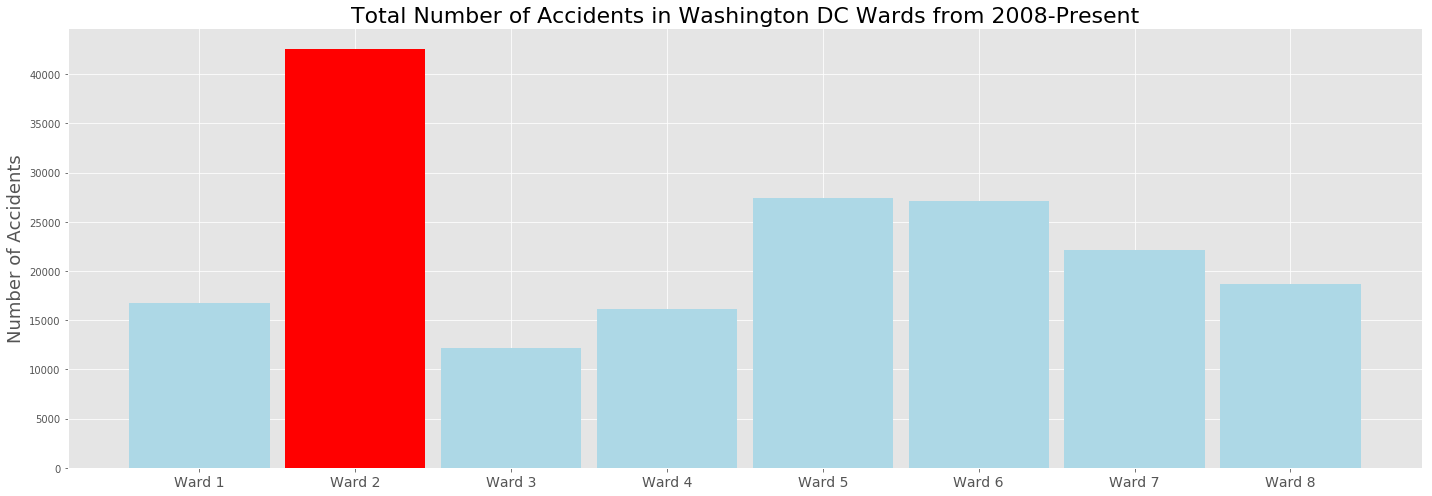

In [49]:
# BAR CHART: Total number of accidents per ward

# Create list of total ward accidents and corresponding colors
totalAccidents = [ward1_totalCount, ward2_totalCount, ward3_totalCount, ward4_totalCount, 
                  ward5_totalCount, ward6_totalCount, ward7_totalCount, ward8_totalCount]

#colors = ["lightblue", "green", "red", "blue", "gold", "grey", "purple", "pink"]
colors = ["lightblue", "red", "lightblue", "lightblue", "lightblue", "lightblue", "lightblue", "lightblue"]

# Plot bar chart: Define x axis, tick mark locations, title and labels
plt.figure(figsize=(20,7))
xAxis = np.arange(len(totalAccidents))
tickLocations = [value for value in xAxis]
plt.xticks(tickLocations, ["Ward 1", "Ward 2", "Ward 3", "Ward 4", "Ward 5", "Ward 6", "Ward 7", "Ward 8"], rotation="0", fontsize=14)
plt.bar(xAxis, totalAccidents, align="center", color=colors, width=.9)
plt.title("Total Number of Accidents in Washington DC Wards from 2008-Present", fontsize=22)
plt.ylabel("Number of Accidents", fontsize=18)
plt.tight_layout()
plt.savefig("DC Wards Total Accidents.png")
plt.show()


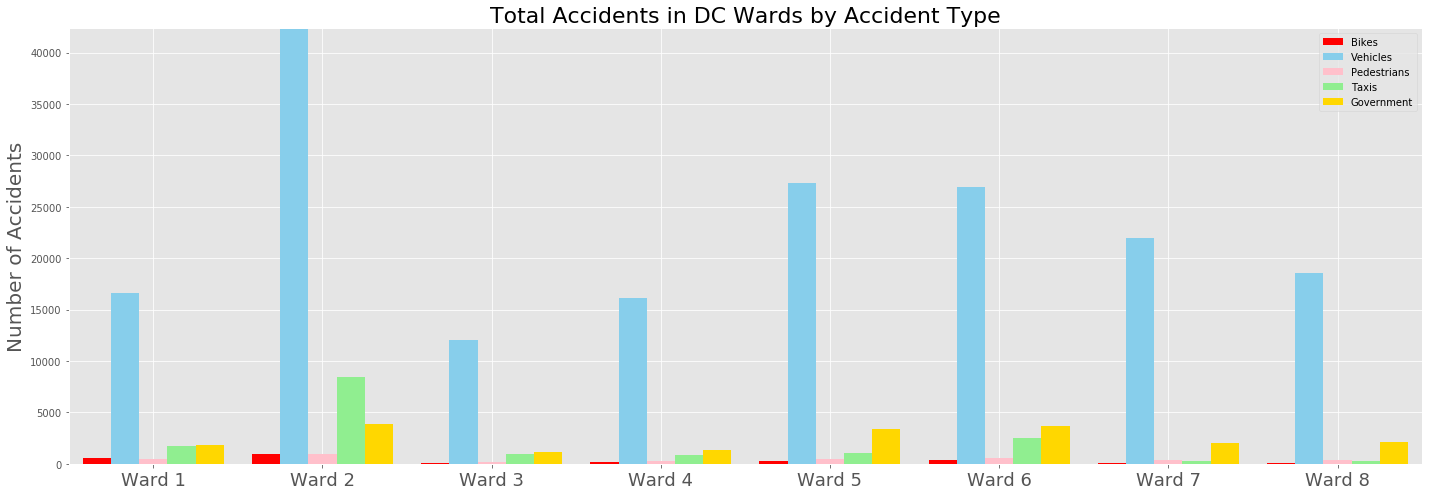

In [50]:
# BAR CHART: Total Accidents in DC Wards by Accident Type

# Create dataframe for wards and accident types
wardCrashData = {"Location": ["Ward 1", "Ward 2", "Ward 3", "Ward 4", "Ward 5", "Ward 6", "Ward 7", "Ward 8"], 
                 "Total Bikes": [ward1_bikeCount, ward2_bikeCount, ward3_bikeCount, ward4_bikeCount, ward5_bikeCount, ward6_bikeCount, ward7_bikeCount, ward8_bikeCount],
                 "Total Vehicles": [ward1_carCount, ward2_carCount, ward3_carCount, ward4_carCount, ward5_carCount, ward6_carCount, ward7_carCount, ward8_carCount],
                 "Total Pedestrians": [ward1_pedestrianCount, ward2_pedestrianCount, ward3_pedestrianCount, ward4_pedestrianCount, ward5_pedestrianCount, ward6_pedestrianCount, ward7_pedestrianCount, ward8_pedestrianCount],
                 "Total Taxis": [ward1_taxiCount, ward2_taxiCount, ward3_taxiCount, ward4_taxiCount, ward5_taxiCount, ward6_taxiCount, ward7_taxiCount, ward8_taxiCount],
                 "Total Government": [ward1_govCount, ward2_govCount, ward3_govCount, ward4_govCount, ward5_govCount, ward6_govCount, ward7_govCount, ward8_govCount]}

wardCrashTypeTotalDF = pd.DataFrame(wardCrashData)
#print(wardCrashTypeTotalDF)

# Setting the positions and width for the bars
xAxis = list(range(len(wardCrashTypeTotalDF["Location"])))
width = .16666667
    
# Plotting the bars
plt.figure(figsize=(20,7))
# Create a bar chart with bike data 
plt.bar([x for x in xAxis], wardCrashTypeTotalDF["Total Bikes"], width, color="red", label="Bike")
plt.bar([x + width for x in xAxis], wardCrashTypeTotalDF["Total Vehicles"], width, color="skyblue", label="Vehicles")
plt.bar([x + width*2 for x in xAxis], wardCrashTypeTotalDF["Total Pedestrians"], width,  color="pink", label="Pedestrians")
plt.bar([x + width*3 for x in xAxis], wardCrashTypeTotalDF["Total Taxis"], width,  color="lightgreen", label="Taxis")
plt.bar([x + width*4 for x in xAxis], wardCrashTypeTotalDF["Total Government"], width, color="gold", label="Government")

# Set chart title and labels
plt.title("Total Accidents in DC Wards by Accident Type", fontsize=22)
plt.ylabel("Number of Accidents", fontsize=20)

# Set the position of the x ticks
tickLocations = [x + 2 * width for x in xAxis]
plt.xticks(tickLocations, ["Ward 1", "Ward 2", "Ward 3", "Ward 4", "Ward 5", "Ward 6", "Ward 7", "Ward 8"], rotation="0", fontsize=18)

# Setting the x-axis and y-axis limits
plt.xlim(min(xAxis)-width, max(xAxis)+width*5)
plt.ylim([0, 10 + max(wardCrashTypeTotalDF["Total Vehicles"])])

# Adding the legend and showing the plot
plt.legend(["Bikes", "Vehicles", "Pedestrians", "Taxis", "Government"], loc="upper right")
plt.tight_layout()
plt.savefig("Total Accidents in DC by Wards and Accidents.png")
plt.show()


In [54]:
# GEOSPATIAL MAPPING: Ward Accidents by Type
ward2DF_2018 = ward2DF.loc[ward2DF["YEAR"] == 2018]
ward2DF_2018["YEAR"].value_counts()

2018    3214
Name: YEAR, dtype: int64

In [55]:
# GEOSPATIAL MAPPING: Ward Accidents by Type
ward2DF_2018 = ward2DF.loc[ward2DF["YEAR"]==2018]

# Create ward crash type dataframes with geolocation data


# WARD1 - Accident Types:
ward2_bikeDF = ward2DF_2018.loc[ward2DF_2018['TOTAL_BICYCLES']>=1]
ward2_bikeGeo = ward2_bikeDF[['LATITUDE', 'LONGITUDE']]

ward2_carDF = ward2DF_2018.loc[ward2DF_2018['TOTAL_VEHICLES']>=1]
ward2_carGeo = ward2_carDF[['LATITUDE', 'LONGITUDE']]

ward2_pedestrianDF = ward2DF_2018.loc[ward2DF_2018['TOTAL_PEDESTRIANS']>=1]
ward2_pedestrianGeo = ward2_pedestrianDF[['LATITUDE', 'LONGITUDE']]

ward2_taxiDF = ward2DF_2018.loc[ward2DF_2018['TOTAL_TAXIS']>=1]
ward2_taxiGeo = ward2_taxiDF[['LATITUDE', 'LONGITUDE']]

ward2_govDF = ward2DF_2018.loc[ward2DF_2018['TOTAL_GOVERNMENT']>=1]
ward2_govGeo = ward2_govDF[['LATITUDE', 'LONGITUDE']]


# Create dataframe containing all Ward 1 geodata by accident type
# ward2_CrashGeo = [ward2_bikeGeo, ward2_pedestrianGeo, ward2_taxiGeo, ward2_govGeo]
#colors = [“red”, “lightblue”, “pink”, “lightgreen”, “gold”]

ward2_bikeLayer = gmaps.symbol_layer(ward2_bikeGeo, fill_color='red', stroke_color='red', scale=3)
ward2_carLayer = gmaps.symbol_layer(ward2_carGeo, fill_color='blue', stroke_color='blue', scale=3)
ward2_pedestrianLayer = gmaps.symbol_layer(ward2_pedestrianGeo, fill_color='yellow', stroke_color='yellow', scale=3)
ward2_taxiLayer = gmaps.symbol_layer(ward2_taxiGeo, fill_color='green', stroke_color='green', scale=3)
ward2_govLayer = gmaps.symbol_layer(ward2_govGeo, fill_color='black', stroke_color='black', scale=3)

fig = gmaps.figure()                                    

fig.add_layer(ward2_carLayer) 
fig.add_layer(ward2_bikeLayer)
fig.add_layer(ward2_pedestrianLayer)
fig.add_layer(ward2_taxiLayer)
fig.add_layer(ward2_govLayer)

fig


Figure(layout=FigureLayout(height='420px'))

In [ ]:
#Create dataframes for each ward for bike crashes
ward1_bike_df = ward1DF.loc[ward1DF["TOTAL_BICYCLES"] >= 1]
ward2_bike_df = ward2DF.loc[ward2DF["TOTAL_BICYCLES"] >= 1]
ward3_bike_df = ward3DF.loc[ward3DF["TOTAL_BICYCLES"] >= 1]
ward4_bike_df = ward4DF.loc[ward4DF["TOTAL_BICYCLES"] >= 1]
ward5_bike_df = ward5DF.loc[ward5DF["TOTAL_BICYCLES"] >= 1]
ward6_bike_df = ward6DF.loc[ward6DF["TOTAL_BICYCLES"] >= 1]
ward7_bike_df = ward7DF.loc[ward7DF["TOTAL_BICYCLES"] >= 1]
ward8_bike_df = ward8DF.loc[ward8DF["TOTAL_BICYCLES"] >= 1]

#Create dataframes for each ward for car crashes
ward1_car_df = ward1DF.loc[ward1DF["TOTAL_VEHICLES"] >= 1]
ward2_car_df = ward2DF.loc[ward2DF["TOTAL_VEHICLES"] >= 1]
ward3_car_df = ward3DF.loc[ward3DF["TOTAL_VEHICLES"] >= 1]
ward4_car_df = ward4DF.loc[ward4DF["TOTAL_VEHICLES"] >= 1]
ward5_car_df = ward5DF.loc[ward5DF["TOTAL_VEHICLES"] >= 1]
ward6_car_df = ward6DF.loc[ward6DF["TOTAL_VEHICLES"] >= 1]
ward7_car_df = ward7DF.loc[ward7DF["TOTAL_VEHICLES"] >= 1]
ward8_car_df = ward8DF.loc[ward8DF["TOTAL_VEHICLES"] >= 1]

#Create dataframes for each ward for pedestrians
ward1_pedestrian_df = ward1DF[ward1DF["TOTAL_PEDESTRIANS"] >= 1]
ward2_pedestrian_df = ward2DF[ward2DF["TOTAL_PEDESTRIANS"] >= 1]
ward3_pedestrian_df = ward3DF[ward3DF["TOTAL_PEDESTRIANS"] >= 1]
ward4_pedestrian_df = ward4DF[ward4DF["TOTAL_PEDESTRIANS"] >= 1]
ward5_pedestrian_df = ward5DF[ward5DF["TOTAL_PEDESTRIANS"] >= 1]
ward6_pedestrian_df = ward6DF[ward6DF["TOTAL_PEDESTRIANS"] >= 1]
ward7_pedestrian_df = ward7DF[ward7DF["TOTAL_PEDESTRIANS"] >= 1]
ward8_pedestrian_df = ward8DF[ward8DF["TOTAL_PEDESTRIANS"] >= 1]

#Create dataframes for each ward for taxis
ward1_taxi_df = ward1DF[ward1DF["TOTAL_TAXIS"] >= 1]
ward2_taxi_df = ward2DF[ward2DF["TOTAL_TAXIS"] >= 1]
ward3_taxi_df = ward3DF[ward3DF["TOTAL_TAXIS"] >= 1]
ward4_taxi_df = ward4DF[ward4DF["TOTAL_TAXIS"] >= 1]
ward5_taxi_df = ward5DF[ward5DF["TOTAL_TAXIS"] >= 1]
ward6_taxi_df = ward6DF[ward6DF["TOTAL_TAXIS"] >= 1]
ward7_taxi_df = ward7DF[ward7DF["TOTAL_TAXIS"] >= 1]
ward8_taxi_df = ward8DF[ward8DF["TOTAL_TAXIS"] >= 1]

#Create dataframes for each ward for government
ward1_gov_df = ward1DF[ward1DF["TOTAL_GOVERNMENT"] >= 1]
ward2_gov_df = ward2DF[ward2DF["TOTAL_GOVERNMENT"] >= 1]
ward3_gov_df = ward3DF[ward3DF["TOTAL_GOVERNMENT"] >= 1]
ward4_gov_df = ward4DF[ward4DF["TOTAL_GOVERNMENT"] >= 1]
ward5_gov_df = ward5DF[ward5DF["TOTAL_GOVERNMENT"] >= 1]
ward6_gov_df = ward6DF[ward6DF["TOTAL_GOVERNMENT"] >= 1]
ward7_gov_df = ward7DF[ward7DF["TOTAL_GOVERNMENT"] >= 1]
ward8_gov_df = ward8DF[ward8DF["TOTAL_GOVERNMENT"] >= 1]


In [ ]:
#Get locations of accidents in each ward

ward1_bikeLocations = ward1_bike_df[['LATITUDE', 'LONGITUDE']]
ward2_bikeLocations = ward2_bike_df[['LATITUDE', 'LONGITUDE']]
ward3_bikeLocations = ward3_bike_df[['LATITUDE', 'LONGITUDE']]
ward4_bikeLocations = ward4_bike_df[['LATITUDE', 'LONGITUDE']]
ward5_bikeLocations = ward5_bike_df[['LATITUDE', 'LONGITUDE']]
ward6_bikeLocations = ward6_bike_df[['LATITUDE', 'LONGITUDE']]
ward7_bikeLocations = ward7_bike_df[['LATITUDE', 'LONGITUDE']]
ward8_bikeLocations = ward8_bike_df[['LATITUDE', 'LONGITUDE']]


ward1_carLocations= ward1_car_df[['LATITUDE', 'LONGITUDE']]
ward2_carLocations= ward2_car_df[['LATITUDE', 'LONGITUDE']]
ward3_carLocations= ward3_car_df[['LATITUDE', 'LONGITUDE']]
ward4_carLocations= ward4_car_df[['LATITUDE', 'LONGITUDE']]
ward5_carLocations= ward5_car_df[['LATITUDE', 'LONGITUDE']]
ward6_carLocations= ward6_car_df[['LATITUDE', 'LONGITUDE']]
ward7_carLocations= ward7_car_df[['LATITUDE', 'LONGITUDE']]
ward8_carLocations= ward8_car_df[['LATITUDE', 'LONGITUDE']]

ward1_pedestrianLocations = ward1_pedestrian_df[['LATITUDE', 'LONGITUDE']]
ward2_pedestrianLocations = ward2_pedestrian_df[['LATITUDE', 'LONGITUDE']]
ward3_pedestrianLocations = ward3_pedestrian_df[['LATITUDE', 'LONGITUDE']]
ward4_pedestrianLocations = ward4_pedestrian_df[['LATITUDE', 'LONGITUDE']]
ward5_pedestrianLocations = ward5_pedestrian_df[['LATITUDE', 'LONGITUDE']]
ward6_pedestrianLocations = ward6_pedestrian_df[['LATITUDE', 'LONGITUDE']]
ward7_pedestrianLocations = ward7_pedestrian_df[['LATITUDE', 'LONGITUDE']]
ward8_pedestrianLocations = ward8_pedestrian_df[['LATITUDE', 'LONGITUDE']]

ward1_taxiLocations = ward1_taxi_df[['LATITUDE', 'LONGITUDE']]
ward2_taxiLocations = ward2_taxi_df[['LATITUDE', 'LONGITUDE']]
ward3_taxiLocations = ward3_taxi_df[['LATITUDE', 'LONGITUDE']]
ward4_taxiLocations = ward4_taxi_df[['LATITUDE', 'LONGITUDE']]
ward5_taxiLocations = ward5_taxi_df[['LATITUDE', 'LONGITUDE']]
ward6_taxiLocations = ward6_taxi_df[['LATITUDE', 'LONGITUDE']]
ward7_taxiLocations = ward7_taxi_df[['LATITUDE', 'LONGITUDE']]
ward8_taxiLocations = ward8_taxi_df[['LATITUDE', 'LONGITUDE']]

ward1_govLocations = ward1_gov_df[['LATITUDE', 'LONGITUDE']]
ward2_govLocations = ward2_gov_df[['LATITUDE', 'LONGITUDE']]
ward3_govLocations = ward3_gov_df[['LATITUDE', 'LONGITUDE']]
ward4_govLocations = ward4_gov_df[['LATITUDE', 'LONGITUDE']]
ward5_govLocations = ward5_gov_df[['LATITUDE', 'LONGITUDE']]
ward6_govLocations = ward6_gov_df[['LATITUDE', 'LONGITUDE']]
ward7_govLocations = ward7_gov_df[['LATITUDE', 'LONGITUDE']]
ward8_govLocations = ward8_gov_df[['LATITUDE', 'LONGITUDE']]

In [ ]:
#Ward 1 Map
ward1_bikeLayer = gmaps.symbol_layer(ward1_bikeLocations, fill_color = 'red', stroke_color = 'red')
ward1_carLayer = gmaps.symbol_layer(ward1_carLocations, fill_color = 'blue', stroke_color = 'blue')
ward1_pedestrianLayer = gmaps.symbol_layer(ward1_pedestrianLocations, fill_color = 'purple', stroke_color = 'purple')
ward1_taxiLayer = gmaps.symbol_layer(ward1_taxiLocations, fill_color = 'green', stroke_color = 'green')
ward1_govLayer = gmaps.symbol_layer(ward1_govLocations, fill_color = 'yellow', stroke_color = 'yellow')

ward1Map = gmaps.figure()
ward1Map.add_layer(ward1_bikeLayer)
ward1Map.add_layer(ward1_carLayer)
ward1Map.add_layer(ward1_pedestrianLayer)
ward1Map.add_layer(ward1_taxiLayer)
ward1Map.add_layer(ward1_govLayer)
ward1Map

In [ ]:
#Ward 2 Map
ward2_bikeLayer = gmaps.symbol_layer(ward2_bikeLocations, fill_color = 'red', stroke_color = 'red')
ward2_carLayer = gmaps.symbol_layer(ward2_carLocations, fill_color = 'blue', stroke_color = 'blue')
ward2_pedestrianLayer = gmaps.symbol_layer(ward2_pedestrianLocations, fill_color = 'purple', stroke_color = 'purple')
ward2_taxiLayer = gmaps.symbol_layer(ward2_taxiLocations, fill_color = 'green', stroke_color = 'green')
ward2_govLayer = gmaps.symbol_layer(ward2_govLocations, fill_color = 'yellow', stroke_color = 'yellow')

ward2Map = gmaps.figure()
ward2Map.add_layer(ward2_bikeLayer)
ward2Map.add_layer(ward2_carLayer)
ward2Map.add_layer(ward2_pedestrianLayer)
ward2Map.add_layer(ward2_taxiLayer)
ward2Map.add_layer(ward2_govLayer)
ward2Map

In [ ]:
#Ward 3 Map
ward3_bikeLayer = gmaps.symbol_layer(ward3_bikeLocations, fill_color = 'red', stroke_color = 'red')
ward3_carLayer = gmaps.symbol_layer(ward3_carLocations, fill_color = 'blue', stroke_color = 'blue')
ward3_pedestrianLayer = gmaps.symbol_layer(ward3_pedestrianLocations, fill_color = 'purple', stroke_color = 'purple')
ward3_taxiLayer = gmaps.symbol_layer(ward3_taxiLocations, fill_color = 'green', stroke_color = 'green')
ward3_govLayer = gmaps.symbol_layer(ward3_govLocations, fill_color = 'yellow', stroke_color = 'yellow')

ward3Map = gmaps.figure()
ward3Map.add_layer(ward3_bikeLayer)
ward3Map.add_layer(ward3_carLayer)
ward3Map.add_layer(ward3_pedestrianLayer)
ward3Map.add_layer(ward3_taxiLayer)
ward3Map.add_layer(ward3_govLayer)
ward3Map

In [ ]:
#Ward 4 Map
ward4_bikeLayer = gmaps.symbol_layer(ward4_bikeLocations, fill_color = 'red', stroke_color = 'red')
ward4_carLayer = gmaps.symbol_layer(ward4_carLocations, fill_color = 'blue', stroke_color = 'blue')
ward4_pedestrianLayer = gmaps.symbol_layer(ward4_pedestrianLocations, fill_color = 'purple', stroke_color = 'purple')
ward4_taxiLayer = gmaps.symbol_layer(ward4_taxiLocations, fill_color = 'green', stroke_color = 'green')
ward4_govLayer = gmaps.symbol_layer(ward4_govLocations, fill_color = 'yellow', stroke_color = 'yellow')

ward4Map = gmaps.figure()
ward4Map.add_layer(ward4_bikeLayer)
ward4Map.add_layer(ward4_carLayer)
ward4Map.add_layer(ward4_pedestrianLayer)
ward4Map.add_layer(ward4_taxiLayer)
ward4Map.add_layer(ward4_govLayer)
ward4Map

In [ ]:
#Ward 5 Map
ward5_bikeLayer = gmaps.symbol_layer(ward5_bikeLocations, fill_color = 'red', stroke_color = 'red')
ward5_carLayer = gmaps.symbol_layer(ward5_carLocations, fill_color = 'blue', stroke_color = 'blue')
ward5_pedestrianLayer = gmaps.symbol_layer(ward5_pedestrianLocations, fill_color = 'purple', stroke_color = 'purple')
ward5_taxiLayer = gmaps.symbol_layer(ward5_taxiLocations, fill_color = 'green', stroke_color = 'green')
ward5_govLayer = gmaps.symbol_layer(ward5_govLocations, fill_color = 'yellow', stroke_color = 'yellow')

ward5Map = gmaps.figure()
ward5Map.add_layer(ward5_bikeLayer)
ward5Map.add_layer(ward5_carLayer)
ward5Map.add_layer(ward5_pedestrianLayer)
ward5Map.add_layer(ward5_taxiLayer)
ward5Map.add_layer(ward5_govLayer)
ward5Map

In [ ]:
#Ward 6 Map
ward6_bikeLayer = gmaps.symbol_layer(ward6_bikeLocations, fill_color = 'red', stroke_color = 'red')
ward6_carLayer = gmaps.symbol_layer(ward6_carLocations, fill_color = 'blue', stroke_color = 'blue')
ward6_pedestrianLayer = gmaps.symbol_layer(ward6_pedestrianLocations, fill_color = 'purple', stroke_color = 'purple')
ward6_taxiLayer = gmaps.symbol_layer(ward6_taxiLocations, fill_color = 'green', stroke_color = 'green')
ward6_govLayer = gmaps.symbol_layer(ward6_govLocations, fill_color = 'yellow', stroke_color = 'yellow')

ward6Map = gmaps.figure()
ward6Map.add_layer(ward6_bikeLayer)
ward6Map.add_layer(ward6_carLayer)
ward6Map.add_layer(ward6_pedestrianLayer)
ward6Map.add_layer(ward6_taxiLayer)
ward6Map.add_layer(ward6_govLayer)
ward6Map

In [ ]:
#Ward 7 Map
ward7_bikeLayer = gmaps.symbol_layer(ward7_bikeLocations, fill_color = 'red', stroke_color = 'red')
ward7_carLayer = gmaps.symbol_layer(ward7_carLocations, fill_color = 'blue', stroke_color = 'blue')
ward7_pedestrianLayer = gmaps.symbol_layer(ward7_pedestrianLocations, fill_color = 'purple', stroke_color = 'purple')
ward7_taxiLayer = gmaps.symbol_layer(ward7_taxiLocations, fill_color = 'green', stroke_color = 'green')
ward7_govLayer = gmaps.symbol_layer(ward7_govLocations, fill_color = 'yellow', stroke_color = 'yellow')

ward7Map = gmaps.figure()
ward7Map.add_layer(ward7_bikeLayer)
ward7Map.add_layer(ward7_carLayer)
ward7Map.add_layer(ward7_pedestrianLayer)
ward7Map.add_layer(ward7_taxiLayer)
ward7Map.add_layer(ward7_govLayer)
ward7Map

In [ ]:
#Ward 8 Map
ward8_bikeLayer = gmaps.symbol_layer(ward8_bikeLocations, fill_color = 'red', stroke_color = 'red')
ward8_carLayer = gmaps.symbol_layer(ward8_carLocations, fill_color = 'blue', stroke_color = 'blue')
ward8_pedestrianLayer = gmaps.symbol_layer(ward8_pedestrianLocations, fill_color = 'purple', stroke_color = 'purple')
ward8_taxiLayer = gmaps.symbol_layer(ward8_taxiLocations, fill_color = 'green', stroke_color = 'green')
ward8_govLayer = gmaps.symbol_layer(ward8_govLocations, fill_color = 'yellow', stroke_color = 'yellow')

ward8Map = gmaps.figure()
ward8Map.add_layer(ward8_bikeLayer)
ward8Map.add_layer(ward8_carLayer)
ward8Map.add_layer(ward8_pedestrianLayer)
ward8Map.add_layer(ward8_taxiLayer)
ward8Map.add_layer(ward8_govLayer)
ward8Map

In [ ]:
# bike_locations = bike_df[['LATITUDE', 'LONGITUDE']]
# driver_locations = driver_df[['LATITUDE', 'LONGITUDE']]
# pedestrian_locations = pedestrian_df[['LATITUDE', 'LONGITUDE']]

In [ ]:
# bike_layer = gmaps.symbol_layer(bike_locations, fill_color = 'blue', stroke_color = 'blue')
# driver_layer = gmaps.symbol_layer(driver_locations, fill_color = 'red', stroke_color = 'red')
# pedestrian_layer = gmaps.symbol_layer(pedestrian_locations, fill_color = 'yellow', stroke_color = 'yellow')

In [ ]:
# fig = gmaps.figure()
# fig.add_layer(bike_layer)
# fig.add_layer(driver_layer)
# fig.add_layer(pedestrian_layer)
# fig

In [ ]:
# bike_df_reduced = bike_df[["ADDRESS", "CRIMEID", "FATAL_BICYCLIST", "FROMDATE", "LATITUDE", "LONGITUDE", "MAJORINJURIES_BICYCLIST", "MINORINJURIES_BICYCLIST","TOTAL_BICYCLES", "XCOORD", "YCOORD"]]
# bike_df_reduced

In [ ]:
# marker_locations = bike_df_reduced[["LATITUDE", "LONGITUDE"]]